# What the popes say?
### *Topic modelling of papal encyclicals*

## Motivation
The Roman Catholic Church is the largest Christian church with 1.3 billion baptised Catholics worldwide. It's voice is highly regarded by many members of the Christian congregation and Churche's view on particular issues is often covered in the media. However, there is no clear distinciton between what is and what is not the true voice of the Church. Unlike many other Christian denominations, the Roman Catholic Church has a clear hierarchy with the pope being it's peak. Therefore, one may consider pope's utterances and proclamaitons as representative for the whole Church. However, the body of official papal documents is abundant and often not easily accesible to someone without philosophical, theological or historical background. Therefore using text mining techniques may be usefull in discovering the true message that the Church has to offer to the world.  
## Aim & Method
The aim of this project is to use text mining techniques to discover what the church says to the world. In particular, my intention was to answer the following question:
* What topics are covered in the official Church documents?

To this end, I used all encyclicals of the last 10 popes (including current Pope Francis) to perform topic modelling using Latent Dirichlet Analysis (LDA). 

The structure of this summary is as follows. Firstly I will explain what encyclicals are and why they are relevant in answering the research question, then I will describe the data I used. Then I will move on to modelling and evaluation method and finally I conclude with description of obtained topics and brief discussion of this project's limitations. 

This report contains very little coding details but, where neccesary, it provides reference to the aprropriate part of the code where the details are available. 

## Why encyclicals?
An encyclical was originally a circular letter sent to all the churches of a particular area in the ancient Roman Church. The word comes from the Late Latin encyclios meaning "circular", "in a circle", or "all-round".

Although the term "encyclical" originally simply meant a circulating letter, it acquired a more specific meaning within the context of the Catholic Church. In 1740, Pope Benedict XIV wrote a letter titled Ubi primum, which is generally regarded as the first encyclical. The term is now used almost exclusively for a kind of letter sent out by the Pope.

For the modern Roman Catholic Church, a papal encyclical is a specific category of papal document, a kind of pastoral letter concerning Catholic doctrine, sent by the Pope and usually addressed especially to patriarchs, primates, archbishops and bishops who are in communion with the Holy See. The form of the address can vary widely, and may concern bishops in a particular area, or designate a wider audience. Papal encyclicals usually take the form of a papal brief due to their more personal nature as opposed to the formal papal bull. They are usually written in Latin and, like most papal documents, the title of the encyclical is usually taken from its first few words.

Due to it's purpose and structure encylcicals form apropriate sample of texts to answer the research question. Firstly they are adressed to wide audience which approximates well the voice of Church in the world. Secondly, their content is usually focused on teaching the doctrine rather then organizational or legal matters (unlike bullas or motu proprio). Finally, as they are often regarded as basic means of communication of pope with the congregation, they are quite loose in form which allows to infere topics with ease.

Just to make it clear, this study does not claim the right to fully determine topics of papal teaching using text mining. In fact, reading and interpreting encyclicals has its own strict rules. Therefore this project should rather be treated as showing the potential of using text mining in less standard domain.


## Data
The dataset used in this project comprises of all encyclicals of the last 10 popes. Chronologically, the first encyclical in the dataset is "*E supremi apostolatus*" by Pope PiusX written in 1903 and the last is "*Fratelli tutti*" by Pope Francis from 2020. Therefore, the data contains more than 100 years of papal teaching which may be considered more than enough to adress the research question. 

More precisely the corpus contains 213 texts that were scrapped by the author from the official vatican website. For details of the process see the notebook *0_scraping*.

The data was subject to preprocessing which included:
* basic cleanup such as removing punctuation, special characters and numerals
* removing stopwords
* word tokenization
* lemmatization

The function *preprocess_text()* is a workhorse of the whole process the function and is defined in the helper_funs.py script.

Apart from that, before feeding the texts to the LDA algorithm the data was enriched in bigrams and trigrams and words that appear too often or too rarely.

### EDA

Then the EDA process was conducted (see notebook *2_EDA*) which showed that there are big differences in the number of encyclicals written by single pope as well as their average length. Not suprisingly, popes which wrote many encyclicals wrote shorter texts, while those with few encyclicals wrote more voluminous works. The only exception is pope John Paul II who wrote quite a lot of quite long encyclicals.

Apart from this inverse proportional relation the EDA revealed that the tendency to write long texts is relatively recent. Up untill the ponticifate of John XXIII (1958–1963) the average number of characters in an encyclical was less than 50 000, while the last 3 pontiffs wrote encyclicals with the average length above 100 000 characters. Pope Francis is an absolute leader in this field with average length of encyclical of just over 170 000 characters.

The EDA process was also used to get rid of non-standard special characters contained in the texts (such as ” or © ) and domain-specific stopwords. This was achieved by the use of function *print_top_k_n_grams(k,n)* which returns k most frequently occuring n-grams in the corpus of encyclicals of a given pope. This operation also allowed to form expectations about the words that may be important in the further modelling process.

## Modelling and evaluation
### Modelling
As it was already indicated, the main modelling proces was carried out using LDA. Technically, I used the gensim package which offers implementation of various text mining alghoritms and utensils. 

In the fitting process, the tokenized and lemmatized texts were enriched in bigrams and trigrams and after that, the whole corpus was filtered to exclude words and phrases that appeared too often or not often enough.

The fitting proces was wrapped in a function that took parameters the following parameters:
- **k** : number of topics
- **no_below, no_above** : lower and upper threashold of extremes filtering. Best described in the documentation:
>*Filter out tokens that appear in
less than no_below documents (absolute number) or
more than no_above documents (fraction of total corpus size, not absolute number).*
- **min_bigram, min_trigram** : lower filtering threshold for bigrams and trigrams. Bigrams and trigrams that appear lower number of times were deleted.

The parameters were tuned in gridsearches w.r.t to metrics described in the next section. Unfortunately, I was unable to perform a full-fledged gridsearch as my laptop quickly ran out of memory. To adress this problem I performed several smaller tunings, to optimize the parameters separately.

### Evaluation

My intention was to find out what the Church is talking about in its official documents. To operationalize this question I reformulate it in terms of topics: find a collection of topics which best describe the collection of encyclicals. To make it even more precise, it was neccesary for me to decide what it means that a collection of topics describes the collection of encyclicals. 
#### Coherence
Firstly, I wanted the topics to be coherent, so that words in a given topic, loosely speaking, correspond to each other in some sense. To evaluate this criterion I used the **U_mass** coherence score which is defined with the following formula:
$$UMass(w_i,w_j)=\frac{\log(D(w_i,w_j)+1)}{D(w_i)},$$

where $D(w_{i}, w_{j})$ indicates how many times words $w_{i}$ and $w_{j}$ appear together in documents, and $D(w_{i})$ is how many time word $w_{i}$ appeared alone. The greater the number, the better is coherence score. Note, that this measure isn’t symmetric, which means that  $UMass(w_{i}, w_{j})$  is not equal to $UMass(w_{j}, w_{i})$.The global coherence of the topic is calculated as the average pairwise coherence scores on the top N words which describe the topic.

Essentially, this measure is the empirical conditional log-probability $\log p(wj|wi) = \log p(wi,wj)p(wj)$ smoothed by adding one to $D(w_i,w_j)$.
So this score measures how much, within the words used to describe a topic, a common word is in average a good predictor for a less common word.

#### Distance to ideal

Secondly, I wanted the topics to be as orthogonal (not overlapping) as possible, so that I am able to capture most content in the least number of topics possible. To measure this criterion I propose my own metric which I call **distance to ideal**.

Using a convenient funciton *mdiff()* from the gensim package, we are able to obtain distance matrix topics retrieved in the LDA. The distance can be specified as one of: 'kullback_leibler', 'hellinger', 'jaccard', 'jensen_shannon'. The claculated distances are normalized to 1. 

In an ideal world we would like to obtain a distance matrix with 0 on diagonal and 1 elsewhere. Therefore the proposed metric is calculated as a distance of the actually obtained matrix to the ideal matrix, so the smaller the metric the better. Technically, it is defined as follows:
$$dist.to.ideal := \lVert A-A_{ideal} \rVert * \alpha,$$
where $A$ is the obtained distance matrix, $A_{ideal}$ is a matrix with 0 on diagonal and 1 elswhere, $\alpha = \frac{1}{k}$ is the scaling factor that allows to compare groups of topics of different cardinality and finally $\lVert X \rVert$ denotes the Frobenius norm of matrix $X$. In code, the returned metric is an average of 4 metrics each calculated using different distances between topics. 

The grid searches that were performed aimed to maximize coherence score and minimize distance to ideal.

The obtained evaluation confirmed that the final LDA model is apropriate to adress the research question. It performs quite well in with respect to both desired aspects (coherence and distance to ideal).

The heatmap below presents the (Jaccard) distance matrix between topics obtained from the final model.
We can observe that all topics are quite far away to each other the only pairs of topics that are slightly closer are topics 0 and 6 and topics 2 and 4.  

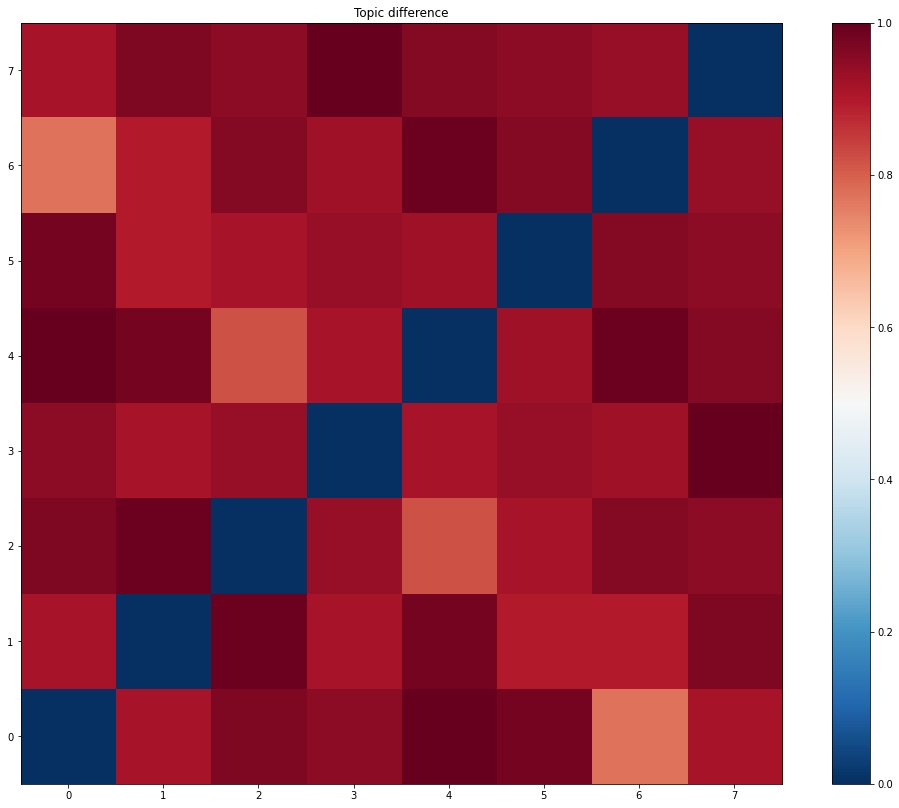

All the modelling and evaluation is placed in the *3_topic_modelling* notebook.

## Results

In this paragraph I will try to answer the research question I posed at the beginning. The reader is advised to firstly have a look at the html file *topics_for_model_ALL_POPES* before reading this section or, even better, have it open while reading and reach to it whenever needed. The html is generated by gensim and contains interactive summary of the results of LDA modelliing. It presents a visualization of how the topics are related to each other (MDS plot) and what words are contained in each topic. By adjusting the relevance threashold one can see the most and least relevant words in a topic.

The conducted analysis revealed 8 key topics that were adressed in the teaching of popes in the last century:

#### Topic 1: Place of institutional church in the world
This topic contains words related both to the Church as an institution (apostolic see, roman pontiff) and words related to secular insticutions (affairs, institutions, civil, law, labour, family, marriage). This topic can be interpreted as popes' discussion of their perspective on what is the role of church in the modern world.

#### Topic 2: Catholic social teaching
In this topic there are many words relating to the socio-economic development (social,development,economic,dignity, freedom, culture, political). This is clearly identified as presenting Churches views on economic relations between people where responsibility towards the earth, dignity of a person and concern for the poor are particularyli stressed.

#### Topic 3: The Eucharist
Here, the teaching about the Holy Eucharist is contained. As Eucharist is the most important part of catholic religous practice. The words in the topic (sacrament, sacrifice, body, blood, mystery, redeemer) indicate that is covers the fundamental doctrinal aspects of what catholics believe about the nature of Eucharist.

#### Topic 4: Missions
The fourth topic mainly concerns the Church's apostolic mission towards the world. Spreading the gospel to all the nations in the world is discussed. Words such as territory, native, africa, local, region indicate that the misison has a very concrete, georgaphical dimension. Words such as unity, community, gospel stress its spiritual aspect as well.

#### Topic 5: Mary, mother of Jesus
An important part of catholic doctrine is the beliefs about Mary. In this topic the fundaments of this beliefs are laid out (virgin, mother_god, rosary, devotion).

#### Topic 6: Second Vatican Council
Second Vatican Council was without doubt the most pivotal event in the past century for the whole Church. It deeply reformed the liturgy and changed the language in which the Church expresses its doctrine. In this topic the most important agreements and decisions made there (eccumenical, dialogue, holy_spirit, mercy).

#### Topic 7: Moral teaching
In this topic words such as (moral, natural_law, education, young, family, morality) indicate that Church trries to convey its moral etical views to the catholic congregation especially the youngest part of it.

#### Topic 8: Faith and science
In the last topic the Church presents its view on relationship between science and faith. Words in this topic (scripture, study, science, error, philosophy, wisdom) indicate that the church is somehow trying to settle the apparent conflict between faith and science.

## Limitations
There are of course limitations to the approach I adopted, however to my mind it is out of the scope of this projects to solve them. 

One of the limitation is that I use only LDA. It would be worth performing some robustness checks using other topic modelling algorithms.
Secondly, one may try to use a richer corpus of texts that would include other papal documents or documents of other Vatican institutions (for instance councils and congregations).
Finally, one may perform wider experimentation with the parameters of the LDA model, as I was not able to perform full gridsearch because of technical limitations.

## References
* https://en.wikipedia.org/wiki/Encyclical
* https://www.baeldung.com/cs/topic-modeling-coherence-score
* http://qpleple.com/topic-coherence-to-evaluate-topic-models/
* https://radimrehurek.com/gensim/auto_examples/howtos/run_compare_lda.html
#### Appendix with "per pope" analysis
At the end of the *3_topic_modelling* notebook there is a bonus analysis in which LDA is fitted to each pope's encyclicals separately. As the results are not relevant to the main research question but are interesting enough to keep them I decided to put them in this appendix as a suplemental material. For each pope, the a vizualisation html was also generated which allows to study the topics he included in his writings.